# Exploratory Data Analysis

## Importing Packages

In [234]:
# importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import requests
import numpy as np
import ssl
_create_unverified_https_context = ssl._create_unverified_context
ssl._create_default_https_context = _create_unverified_https_context

## Reading in Data

In [3]:
# reading in the historic dataframe
historic_df = pd.read_csv('../data/NABR_historic.csv') 
historic_df.head()

,long,lat,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
2,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
4,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.45,0.113447,0.096831,0.041876,0.052298


In [4]:
# reading in the recent dataframe
recent_df = pd.read_csv('../data/nearterm_data_2020-2024.csv') 
recent_df.head()

,long,lat,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,-110.0472,37.60413,2021,NT,4.5,sc22,0,0,84,5,...,6.37,1.630333,24.50402,24.50402,36.89,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,2021,NT,4.5,sc22,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.77,0.114652,0.078764,0.043514,0.051281
2,-110.0472,37.60413,2021,NT,4.5,sc23,0,0,84,5,...,3.09,1.389056,24.11043,24.11043,37.95,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,2021,NT,4.5,sc23,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-18.96,0.130221,0.096412,0.041232,0.092241
4,-110.0472,37.60413,2021,NT,4.5,sc24,0,0,84,5,...,6.87,-0.334389,25.54266,10.31321,37.74,NaN,NaN,NaN,NaN,NaN


## Initial EDA

### Data Shape

In [5]:
historic_df.shape

(13821, 29)

In [6]:
recent_df.shape

(55802, 29)

### Summary Statistics for Numerical Columns

In [7]:
historic_df.describe()

,long,lat,year,treecanopy,Ann_Herb,Bare,Herb,Litter,Shrub,DrySoilDays_Summer_whole,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
count,13821.000000,13821.000000,13821.000000,13821.000000,13821.000000,13821.000000,13821.000000,13821.000000,13821.000000,4476.000000,...,7930.000000,9453.000000,9453.000000,7930.000000,9453.000000,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000
mean,-110.005518,37.608507,1998.889299,10.062586,0.228131,56.148976,9.553144,11.769626,15.482454,7.447274,...,7.335531,-0.141305,22.409513,10.722353,35.880022,-15.534115,0.119312,0.109115,0.068170,0.093811
std,0.022635,0.016206,11.283303,8.855615,1.069702,18.418774,3.887177,6.112302,8.594975,20.763970,...,3.619670,1.400045,1.024607,8.150340,1.346755,3.135112,0.037770,0.039504,0.018894,0.028577
min,-110.047200,37.570340,1980.000000,0.000000,0.000000,11.000000,1.000000,1.000000,0.000000,0.000000,...,1.760000,-3.434615,19.554890,-3.434615,32.150000,-26.250000,0.032807,0.034724,0.030281,0.031248
25%,-110.027300,37.598060,1989.000000,0.000000,0.000000,43.000000,8.000000,7.000000,10.000000,0.000000,...,4.870000,-1.228889,21.714130,2.312500,34.950000,-17.250000,0.091431,0.079048,0.052521,0.073958
50%,-110.005000,37.609150,1999.000000,9.000000,0.000000,54.000000,10.000000,10.000000,15.000000,0.000000,...,6.720000,-0.208333,22.327170,10.509780,35.850000,-14.950000,0.119300,0.101166,0.066038,0.092939
75%,-109.987800,37.622350,2009.000000,18.000000,0.000000,67.000000,11.000000,16.000000,20.000000,0.000000,...,9.690000,0.906593,23.132610,13.428020,37.050000,-13.850000,0.144474,0.138545,0.083102,0.111148
max,-109.965900,37.634760,2018.000000,29.000000,6.000000,94.000000,20.000000,26.000000,46.000000,89.000000,...,20.630000,3.393333,24.550000,24.550000,38.550000,-9.350000,0.232833,0.214546,0.119182,0.205399


Historical data ranges from 1980-2018. 

In [8]:
recent_df.describe()

,long,lat,year,RCP,treecanopy,Ann_Herb,Bare,Herb,Litter,Shrub,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
count,55802.000000,55802.000000,55802.000000,55802.000000,55802.000000,55802.000000,55802.000000,55802.000000,55802.000000,55802.000000,...,32000.000000,37882.000000,37882.000000,32000.000000,37882.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000
mean,-110.006322,37.608169,2022.499211,6.501290,9.672682,0.226067,56.630497,9.506523,11.736192,15.348428,...,7.876302,1.061328,23.896685,11.987947,37.409251,-13.854524,0.130339,0.113198,0.069430,0.095702
std,0.022496,0.016194,1.117402,2.000018,8.785014,1.063672,18.480834,3.891147,6.101769,8.562249,...,4.170495,1.649202,1.160074,8.181101,1.886281,4.273170,0.039756,0.041728,0.019916,0.031099
min,-110.047200,37.570340,2021.000000,4.500000,0.000000,0.000000,11.000000,1.000000,1.000000,0.000000,...,0.430000,-5.392722,19.264730,-5.392722,31.370000,-30.270000,0.036778,0.032329,0.029968,0.031148
25%,-110.027300,37.598060,2022.000000,4.500000,0.000000,0.000000,45.000000,8.000000,8.000000,10.000000,...,4.790000,0.110056,23.150540,4.064556,36.280000,-16.470000,0.102253,0.079512,0.052745,0.073698
50%,-110.005700,37.608620,2022.000000,8.500000,9.000000,0.000000,56.000000,10.000000,10.000000,14.000000,...,7.300000,1.143556,23.927660,11.702030,37.400000,-12.900000,0.129224,0.105576,0.068260,0.092410
75%,-109.990900,37.621560,2023.000000,8.500000,18.000000,0.000000,67.000000,11.000000,16.000000,20.000000,...,10.360000,2.135722,24.576680,14.686260,38.290000,-10.950000,0.155793,0.144423,0.084791,0.112807
max,-109.965900,37.634760,2024.000000,8.500000,29.000000,6.000000,94.000000,20.000000,26.000000,46.000000,...,33.730000,5.474725,27.745330,27.745330,47.170000,-6.510000,0.241642,0.219919,0.145245,0.230940


Recent data ranges from 2021-2024.

### Column Datatypes

In [9]:
historic_df.dtypes

long                                      float64
lat                                       float64
year                                        int64
TimePeriod                                 object
RCP                                        object
scenario                                   object
treecanopy                                  int64
Ann_Herb                                    int64
Bare                                        int64
Herb                                        int64
Litter                                      int64
Shrub                                       int64
DrySoilDays_Summer_whole                  float64
Evap_Summer                               float64
ExtremeShortTermDryStress_Summer_whole    float64
FrostDays_Winter                          float64
NonDrySWA_Summer_whole                    float64
PPT_Winter                                float64
PPT_Summer                                float64
PPT_Annual                                float64


In [10]:
recent_df.dtypes

long                                      float64
lat                                       float64
year                                        int64
TimePeriod                                 object
RCP                                       float64
scenario                                   object
treecanopy                                  int64
Ann_Herb                                    int64
Bare                                        int64
Herb                                        int64
Litter                                      int64
Shrub                                       int64
DrySoilDays_Summer_whole                  float64
Evap_Summer                               float64
ExtremeShortTermDryStress_Summer_whole    float64
FrostDays_Winter                          float64
NonDrySWA_Summer_whole                    float64
PPT_Winter                                float64
PPT_Summer                                float64
PPT_Annual                                float64


### Identify NANs

In [14]:
historic_df.isna().sum()

long                                         0
lat                                          0
year                                         0
TimePeriod                                   0
RCP                                          0
scenario                                     0
treecanopy                                   0
Ann_Herb                                     0
Bare                                         0
Herb                                         0
Litter                                       0
Shrub                                        0
DrySoilDays_Summer_whole                  9345
Evap_Summer                               9345
ExtremeShortTermDryStress_Summer_whole    9345
FrostDays_Winter                          9345
NonDrySWA_Summer_whole                    9368
PPT_Winter                                4368
PPT_Summer                                4368
PPT_Annual                                5891
T_Winter                                  4368
T_Summer     

In [15]:
recent_df.isna().sum()

long                                          0
lat                                           0
year                                          0
TimePeriod                                    0
RCP                                           0
scenario                                      0
treecanopy                                    0
Ann_Herb                                      0
Bare                                          0
Herb                                          0
Litter                                        0
Shrub                                         0
DrySoilDays_Summer_whole                  37529
Evap_Summer                               37529
ExtremeShortTermDryStress_Summer_whole    37535
FrostDays_Winter                          37529
NonDrySWA_Summer_whole                    37630
PPT_Winter                                17920
PPT_Summer                                17920
PPT_Annual                                23802
T_Winter                                

### Viewing Correlations

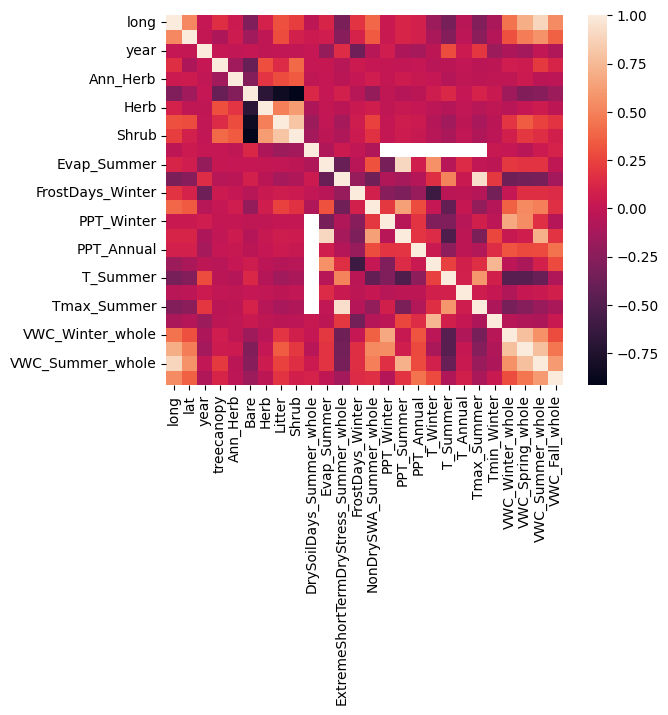

In [24]:
sns.heatmap(historic_df.select_dtypes(include='number').corr())
plt.show()

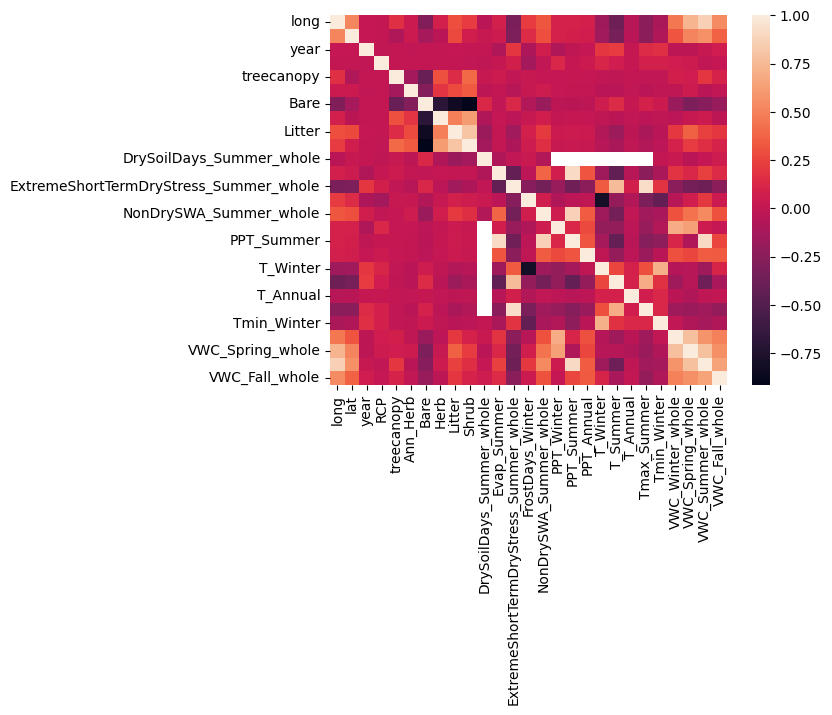

In [25]:
sns.heatmap(recent_df.select_dtypes(include='number').corr())
plt.show()

### Year

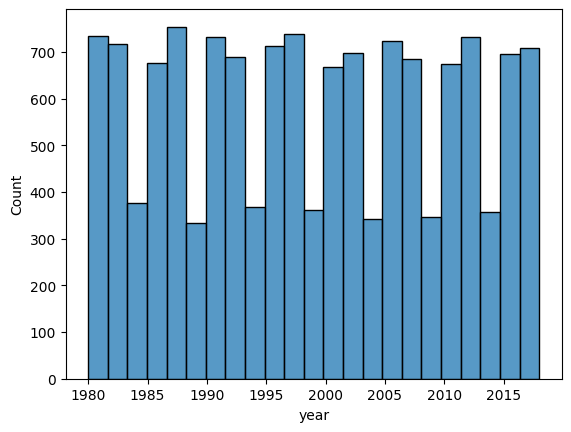

In [28]:
sns.histplot(data=historic_df, x="year")
plt.show()

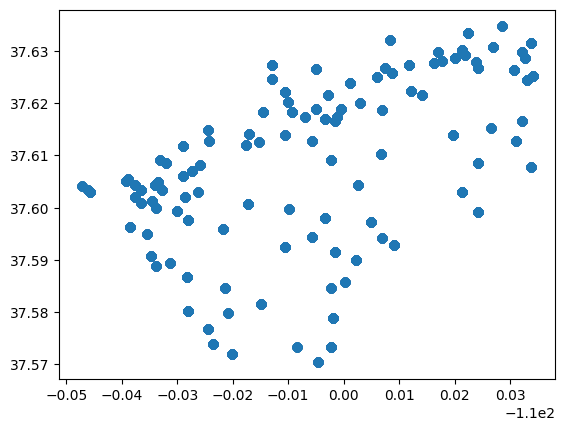

In [30]:
plt.scatter(x=historic_df['long'], y=historic_df['lat'])
plt.show()

In [254]:
df_1980 = historic_df[historic_df['year'] == 2014]

cmap = plt.colormaps['Greens']

from matplotlib.colors import Normalize

norm = Normalize(vmin=historic_df['Litter'].min(), vmax=historic_df['Litter'].max())

df_1980['color'] = df_1980['Litter'].apply(lambda x: cmap(norm(x)))

def rgba_to_hex(rgba):
    return '#' + ''.join([f'{int(255 * c):02x}' for c in rgba[:3]])

df_1980['color'] = df_1980['color'].apply(rgba_to_hex)

state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()
state_data = pd.read_csv(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_unemployment_oct_2012.csv"
)

m = folium.Map(location=[37.608507, -110.005518], zoom_start=12.5)


for i in range(df_1980.shape[0]):
    if not np.isnan(df_1980.iloc[i].Litter):
      folium.CircleMarker(location=[df_1980.iloc[i].lat,df_1980.iloc[i].long], radius= 8,
                        color=df_1980.iloc[i].color, fill_color = df_1980.iloc[i].color,
                        fill = True, fill_opacity=0.7, tooltip=df_1980.iloc[i].Litter).add_to(m)
m

/var/folders/_8/crn2q8y154j26jm9jc_zpzgw0000gn/T/ipykernel_31366/1183562974.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980['color'] = df_1980['Litter'].apply(lambda x: cmap(norm(x)))
/var/folders/_8/crn2q8y154j26jm9jc_zpzgw0000gn/T/ipykernel_31366/1183562974.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980['color'] = df_1980['color'].apply(rgba_to_hex)
